In [53]:
import re
import platform
import sys
import os
import tweepy as tw
import twitter
import pandas as pd
import csv
from tweepy import Cursor
from datetime import datetime, date, time, timedelta
from collections import Counter
import datetime
import matplotlib.pyplot as plt

In [4]:
CONSUMER_KEY = 'kKEOC6n2BKBVsks5RH45BmiRw'
CONSUMER_SECRET = 'rXrfijW6S2wxb4Mt4yVil36QDcZNawsotjBb8X9PQ2zejmX6mr'

# to get the oauth credential you need to click on the 'Generate access token' button:
OAUTH_TOKEN = '1225147204739964929-obkKVb4GndaWd3GnZY6aCLafFPtbD7' 
OAUTH_TOKEN_SECRET = '7xNKPaSPQHfMzPeiD8JIemKg8dCQOBa3jp4Tx0922GGNP'
auth = twitter.oauth.OAuth(OAUTH_TOKEN, OAUTH_TOKEN_SECRET,CONSUMER_KEY, CONSUMER_SECRET)
twitter_api = twitter.Twitter(auth=auth)
print(twitter_api) 

In [15]:
tweets_time = ['Time',]
tweets_id = ['Post_id',]
tweets_text = ['Tweet',]
tweets_retweet_count = ['Comment count',]
tweets_likes = ['Like count']

auth = tw.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
auth.set_access_token(OAUTH_TOKEN, OAUTH_TOKEN_SECRET)
api = tw.API(auth, wait_on_rate_limit=True)

def clean_tweet(tweet):
    return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", "", tweet).split())

In [6]:
date_since = '2020-02-21'
date_until = '2020-03-03'
tweets_time = []
tweets_id = []
tweets_text = []
account_list = ["pizzahut"]

if len(account_list) > 0:
    for target in account_list:
        print("Getting data for " + target)
        item = api.get_user(target)
        print("name: " + item.name)
        print("screen_name: " + item.screen_name)
        print("description: " + item.description)
        print("statuses_count: " + str(item.statuses_count))
        print("friends_count: " + str(item.friends_count))
        print("followers_count: " + str(item.followers_count))

Getting data for pizzahut
name: Pizza Hut
screen_name: pizzahut
description: Proud Sponsor of the NFL and NCAA®.
statuses_count: 442841
friends_count: 88305
followers_count: 1625818


In [7]:
account_created_date = item.created_at
delta = datetime.utcnow() - account_created_date
account_age_days = delta.days
print("Account age (in days): " + str(account_age_days))

Account age (in days): 4466


In [16]:
#Array to hold most popular hashtags and mentions for later
hashtags = []
mentions = []
tweet_count = 0
end_date = datetime.utcnow() - timedelta(days=30)
for tweet in Cursor(api.user_timeline, id=target).items():
    if tweet.in_reply_to_status_id is None:
        #Tweet is not a reply
        #print(tweet.text)
        #print(tweet.retweet_count)
        #print(tweet.favorite_count)
        tweets_time.append(tweet.created_at)
        tweets_id.append(tweet.id)
        tweets_text.append(clean_tweet(tweet.text))
        tweets_retweet_count.append(tweet.retweet_count)
        tweets_likes.append(tweet.favorite_count)

rows = zip(tweets_time, tweets_id, tweets_text,tweets_retweet_count,tweets_likes)

In [17]:
newPath = "pizzahut_data.csv"
print('writing')
with open(newPath, "w") as f:
    writer = csv.writer(f)
    for row in rows:
        writer.writerow(row)
print('done')

writing
done


In [24]:
pizzahut_data = pd.read_csv(newPath)

In [56]:
date = pizzahut_data['Time']


In [73]:
for i in range(len(date)):
    dt = date[i][:10]
    year, month, day = (int(x) for x in dt.split('-'))    
    ans = datetime.date(year, month, day)
    pizzahut_data['Weekday'][i] = ans.strftime("%A")

/home/isualice/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [74]:
df = pizzahut_data
df.to_csv('pizzahut_Data.csv',index=False)

Text(0, 0.5, 'Official tweets number')

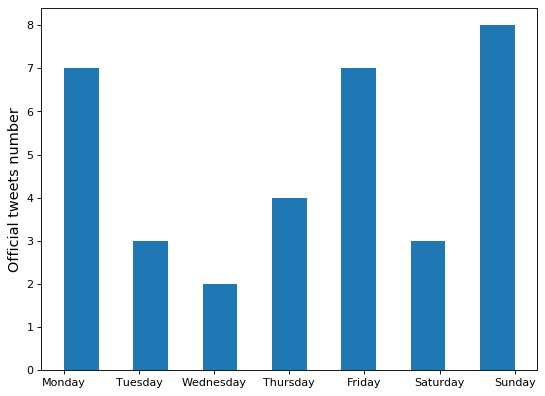

In [79]:
plt.figure(figsize=(8,6),dpi=80)
cats = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df['Weekday'] = pd.Categorical(df['Weekday'], categories=cats, ordered=True)
df = df.sort_values('Weekday')
weekday = df['Weekday']
plt.hist(weekday,bins=13)
plt.ylabel('Official tweets number',fontsize=13)

In [87]:
Monday_comment = 0
Tuesday_comment = 0
Wednesday_comment = 0
Thursday_comment = 0
Friday_comment = 0
Saturday_comment = 0
Sunday_comment = 0

comment = df['Comment count']
for i in range(len(weekday)):
    if weekday[i] == 'Monday':
        Monday_comment += comment[i]
    if weekday[i] == 'Tuesday':
        Tuesday_comment += comment[i]
    if weekday[i] == 'Wednesday':
        Wednesday_comment += comment[i]
    if weekday[i] == 'Thursday':
        Thursday_comment += comment[i]
    if weekday[i] == 'Friday':
        Friday_comment += comment[i]
    elif weekday[i] == 'Saturday':
        Saturday_comment += comment[i]
    else:
        Sunday_comment += comment[i]

comment_count = dict()
comment_count['Monday'] = Monday_comment
comment_count['Tuesday'] = Tuesday_comment
comment_count['Wednesday'] = Wednesday_comment
comment_count['Thursday'] = Thursday_comment
comment_count['Friday'] = Friday_comment
comment_count['Saturday'] = Saturday_comment
comment_count['Sunday'] = Sunday_comment

print(comment_count)

{'Monday': 542, 'Tuesday': 160, 'Wednesday': 107, 'Thursday': 270, 'Friday': 290, 'Saturday': 124, 'Sunday': 1877}


Text(0, 0.5, 'Comment counts')

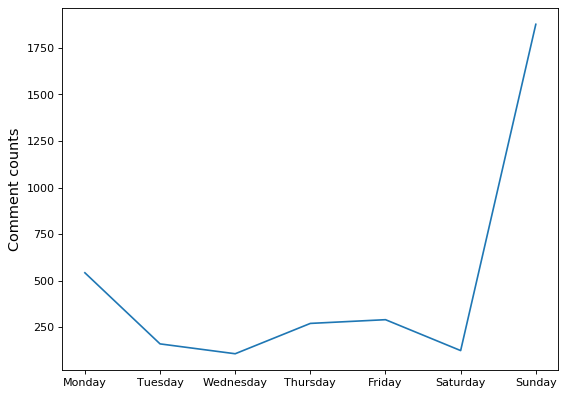

In [96]:
plt.figure(figsize=(8,6),dpi=80)

plt.plot(list(comment_count.keys()),list(comment_count.values()))
plt.ylabel('Comment counts',fontsize=13)

In [97]:
Monday_like = 0
Tuesday_like = 0
Wednesday_like = 0
Thursday_like = 0
Friday_like = 0
Saturday_like = 0
Sunday_like = 0

like = df['Like count']
for i in range(len(weekday)):
    if weekday[i] == 'Monday':
        Monday_like += like[i]
    if weekday[i] == 'Tuesday':
        Tuesday_like += like[i]
    if weekday[i] == 'Wednesday':
        Wednesday_like += like[i]
    if weekday[i] == 'Thursday':
        Thursday_like += like[i]
    if weekday[i] == 'Friday':
        Friday_like += like[i]
    elif weekday[i] == 'Saturday':
        Saturday_like += like[i]
    else:
        Sunday_like += like[i]

like_count = dict()
like_count['Monday'] = Monday_like
like_count['Tuesday'] = Tuesday_like
like_count['Wednesday'] = Wednesday_like
like_count['Thursday'] = Thursday_like
like_count['Friday'] = Friday_like
like_count['Saturday'] = Saturday_like
like_count['Sunday'] = Sunday_like

print(like_count)

{'Monday': 2423, 'Tuesday': 990, 'Wednesday': 1047, 'Thursday': 1515, 'Friday': 2189, 'Saturday': 941, 'Sunday': 9401}


Text(0, 0.5, 'like counts')

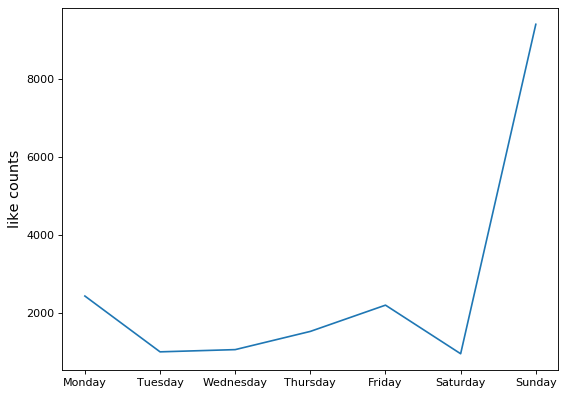

In [98]:
plt.figure(figsize=(8,6),dpi=80)

plt.plot(list(like_count.keys()),list(like_count.values()))
plt.ylabel('like counts',fontsize=13)